In [3]:
#Failide lugemiseks Colabis
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/Andmeteadus/Projekt/DataScienceProject")

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("Mined_data.csv")

In [7]:
df

,Artist,Id,Artist Genres,New Name
0,Tommy Richman,1WaFQSHVGZQJTbf0BdxdNo,[],Tommy Richman
1,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,"['hip hop', 'west coast hip hop']",Kendrick Lamar
2,Artemas,0PCCGZ0wGLizHt2KZ7hhA2,[],Artemas
3,Miley Cyrus,5YGY8feqx7naU7z4HrwZM6,[],Miley Cyrus
4,Eminem,7dGJo4pcD2V6oG8kP0tJRR,"['rap', 'hip hop']",Eminem
...,...,...,...,...
1995,Serranow,38NpF2cwENnpQ3P19UnyUP,[],Serranow
1996,Steps,17UkABEasVRlCcIFZ3wHb7,[],Steps
1997,Kerim Araz,2xNgzwX6A9orF0QEJph5Eb,"['turkish pop', 'arabesk']",Kerim Araz
1998,Jaques Raupï¿,7BPiWKbeuWueq4qGMz3A0T,[],Jaques Raupé


In [9]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [10]:
##IMPORT

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# dealing with missing vals
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

#label binarizing
from sklearn.preprocessing import MultiLabelBinarizer


#forest
from sklearn.ensemble import RandomForestRegressor

# cross val
from sklearn.model_selection import GridSearchCV

#ridge regression
from sklearn.linear_model import Ridge

#lasso
from sklearn.linear_model import Lasso

#catboost
from catboost import CatBoostRegressor

#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Nerual network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
import pandas as pd
df_standardized = pd.read_csv("Standardized_data.csv")

In [151]:
# Load your data
df_standardized = pd.read_csv("Standardized_data.csv")

# ------------------ LINEAR REGRESSION - hea track score'le

# Convert Release Date to datetime and compute Track Age
df_standardized['Release Date'] = pd.to_datetime(df_standardized['Release Date'], errors='coerce')
today = pd.to_datetime('today')
df_standardized['Track_Age_Days'] = (today - df_standardized['Release Date']).dt.days
df_standardized['Track_Age_Days'] = df_standardized['Track_Age_Days'].fillna(df_standardized['Track_Age_Days'].median())

genres_encoded = mlb.fit_transform(df_standardized['Artist Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df_standardized.index)
X_full = pd.concat([df_standardized[numeric_features], genres_df], axis=1)

# Fill missing Explicit Track with 0 if necessary
df_standardized['Explicit Track'] = df_standardized['Explicit Track'].fillna(0)

# Fill missing Artist Genres with empty list
df_standardized['Artist Genres'] = df_standardized['Artist Genres'].apply(lambda x: x if isinstance(x, list) else [])


# Numeric features
numeric_features = [
    "Spotify Streams", "YouTube Views", "TikTok Views", "Soundcloud Streams",
    "Pandora Streams", "YouTube Likes", "TikTok Likes", "Shazam Counts",
    "AirPlay Spins", "SiriusXM Spins",
    "Spotify Playlist Count", "Spotify Playlist Reach",
    "Apple Music Playlist Count",
    "Deezer Playlist Count", "Deezer Playlist Reach",
    "Playlist Count", "Playlist Reach",
    "All Time Rank",
    "Track_Age_Days",
    "Explicit Track"
]

# Combine numeric and genre features
X_full = pd.concat([df_standardized[numeric_features], genres_df], axis=1)
X_full = X_full.fillna(X_full.median())

# Targets
y_track = df_standardized["Track Score"]
y_spotify = df_standardized["Spotify Popularity"]

# ------------------ TRAIN/TEST SPLIT ------------------

# Track Score
mask_track = ~y_track.isna()
X_track = X_full[mask_track]
y_track_clean = y_track[mask_track]
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(
    X_track, y_track_clean, test_size=0.2, random_state=42
)

# Spotify Popularity
mask_spotify = ~y_spotify.isna()
X_spotify = X_full[mask_spotify]
y_spotify_clean = y_spotify[mask_spotify]
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(
    X_spotify, y_spotify_clean, test_size=0.2, random_state=42
)

# Fill missing numeric values using training median
X_train_track = X_train_track.fillna(X_train_track.median())
X_test_track = X_test_track.fillna(X_train_track.median())
X_train_spotify = X_train_spotify.fillna(X_train_spotify.median())
X_test_spotify = X_test_spotify.fillna(X_train_spotify.median())

# ------------------ MODEL TRAINING ------------------

# Linear Regression for Track Score
track_model = LinearRegression()
track_model.fit(X_train_track, y_train_track)
y_pred_track = track_model.predict(X_test_track)

# Linear Regression for Spotify Popularity
spotify_model = LinearRegression()
spotify_model.fit(X_train_spotify, y_train_spotify)
y_pred_spotify = spotify_model.predict(X_test_spotify)

# ------------------ EVALUATION ------------------

print("Track Score R²:", r2_score(y_test_track, y_pred_track))
print("Track Score MSE:", mean_squared_error(y_test_track, y_pred_track))

print("Spotify Popularity R²:", r2_score(y_test_spotify, y_pred_spotify))
print("Spotify Popularity MSE:", mean_squared_error(y_test_spotify, y_pred_spotify))

Track Score R²: 0.606040611408069
Track Score MSE: 0.37427594257922264
Spotify Popularity R²: 0.29102533060823477
Spotify Popularity MSE: 0.7783679601100211


In [123]:
# ------------------ RANDOM TREE - hea spotify r squared
# Track age in days
df_standardized['Release Date'] = pd.to_datetime(df_standardized['Release Date'], errors='coerce')
today = pd.to_datetime('today')
df_standardized['Track_Age_Days'] = (today - df_standardized['Release Date']).dt.days
df_standardized['Track_Age_Days'] = df_standardized['Track_Age_Days'].fillna(df_standardized['Track_Age_Days'].median())

# Explicit Track (fill missing with 0)
df_standardized['Explicit Track'] = df_standardized['Explicit Track'].fillna(0)

# Artist Genres (ensure list format)
df_standardized['Artist Genres'] = df_standardized['Artist Genres'].apply(lambda x: x if isinstance(x, list) else [])

# One-hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df_standardized['Artist Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df_standardized.index)

# Numeric features
numeric_features = [
    "Spotify Streams", "YouTube Views", "TikTok Views", "Soundcloud Streams",
    "Pandora Streams", "YouTube Likes", "TikTok Likes", "Shazam Counts",
    "AirPlay Spins", "SiriusXM Spins",
    "Spotify Playlist Count", "Spotify Playlist Reach",
    "Apple Music Playlist Count",
    "Deezer Playlist Count", "Deezer Playlist Reach",
    "Playlist Count", "Playlist Reach",
    "All Time Rank",
    "Track_Age_Days",
    "Explicit Track"
]

# Optional: log-transform skewed features
skewed_features = [
    "Spotify Streams", "YouTube Views", "TikTok Views", "Soundcloud Streams",
    "Pandora Streams", "YouTube Likes", "TikTok Likes", "Shazam Counts",
    "AirPlay Spins", "SiriusXM Spins"
]
df_standardized[skewed_features] = np.log1p(df_standardized[skewed_features])

# Combine numeric + genres
X_full = pd.concat([df_standardized[numeric_features], genres_df], axis=1)
X_full = X_full.fillna(X_full.median())

# Targets
y_track = df_standardized["Track Score"]
y_spotify = df_standardized["Spotify Popularity"]

# ------------------ TRAIN/TEST SPLIT ------------------
# Track Score
mask_track = ~y_track.isna()
X_track = X_full[mask_track]
y_track_clean = y_track[mask_track]
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(
    X_track, y_track_clean, test_size=0.2, random_state=42
)

# Spotify Popularity
mask_spotify = ~y_spotify.isna()
X_spotify = X_full[mask_spotify]
y_spotify_clean = y_spotify[mask_spotify]
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(
    X_spotify, y_spotify_clean, test_size=0.2, random_state=42
)

# ------------------ RANDOM FOREST TRAINING ------------------
# Track Score
track_model = RandomForestRegressor(n_estimators=200, random_state=42)
track_model.fit(X_train_track, y_train_track)
y_pred_track = track_model.predict(X_test_track)

# Spotify Popularity
spotify_model = RandomForestRegressor(n_estimators=200, random_state=42)
spotify_model.fit(X_train_spotify, y_train_spotify)
y_pred_spotify = spotify_model.predict(X_test_spotify)

# ------------------ EVALUATION ------------------
print("Track Score R²:", r2_score(y_test_track, y_pred_track))
print("Track Score MSE:", mean_squared_error(y_test_track, y_pred_track))

print("Spotify Popularity R²:", r2_score(y_test_spotify, y_pred_spotify))
print("Spotify Popularity MSE:", mean_squared_error(y_test_spotify, y_pred_spotify))

Track Score R²: 0.9977388702153706
Track Score MSE: 0.002148156652544595
Spotify Popularity R²: 0.6165213147160807
Spotify Popularity MSE: 0.421012957016069


In [126]:
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5, 10]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train_spotify, y_train_spotify)
print("Best params:", grid.best_params_)
print("CV R²:", grid.best_score_)

Best params: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 500}
CV R²: 0.6283366932393459


In [144]:
# ------------------ LOAD DATA ------------------
df_standardized = pd.read_csv("Standardized_data.csv")

#--------------------CATBOOST REGR - hea spotify popularity

# Convert Release Date to datetime and compute Track Age
df_standardized['Release Date'] = pd.to_datetime(df_standardized['Release Date'], errors='coerce')
today = pd.to_datetime('today')
df_standardized['Track_Age_Days'] = (today - df_standardized['Release Date']).dt.days
df_standardized['Track_Age_Days'] = df_standardized['Track_Age_Days'].fillna(df_standardized['Track_Age_Days'].median())

# Handle Artist Genres
mlb = MultiLabelBinarizer()
df_standardized['Artist Genres'] = df_standardized['Artist Genres'].apply(lambda x: x if isinstance(x, list) else [])
genres_encoded = mlb.fit_transform(df_standardized['Artist Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df_standardized.index)

# Numeric features
numeric_features = [
    "Spotify Streams", "YouTube Views", "TikTok Views", "Soundcloud Streams",
    "Pandora Streams", "YouTube Likes", "TikTok Likes", "Shazam Counts",
    "AirPlay Spins", "SiriusXM Spins",
    "Spotify Playlist Count", "Spotify Playlist Reach",
    "Apple Music Playlist Count",
    "Deezer Playlist Count", "Deezer Playlist Reach",
    "Playlist Count", "Playlist Reach",
    "All Time Rank",
    "Track_Age_Days",
    "Explicit Track"
]

# Fill missing Explicit Track with 0
df_standardized['Explicit Track'] = df_standardized['Explicit Track'].fillna(0)

# Combine numeric and genre features
X_full = pd.concat([df_standardized[numeric_features], genres_df], axis=1)
X_full = X_full.fillna(X_full.median())

# Targets
y_track = df_standardized["Track Score"]
y_spotify = df_standardized["Spotify Popularity"]

# ------------------ TRAIN/TEST SPLIT ------------------

# Track Score
mask_track = ~y_track.isna()
X_track = X_full[mask_track]
y_track_clean = y_track[mask_track]
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(
    X_track, y_track_clean, test_size=0.2, random_state=42
)

# Spotify Popularity
mask_spotify = ~y_spotify.isna()
X_spotify = X_full[mask_spotify]
y_spotify_clean = y_spotify[mask_spotify]
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(
    X_spotify, y_spotify_clean, test_size=0.2, random_state=42
)

# ------------------ MODEL TRAINING ------------------

# CatBoost for Track Score
track_model = CatBoostRegressor(
    iterations=1000,        # number of trees
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=100
)
track_model.fit(X_train_track, y_train_track)
y_pred_track = track_model.predict(X_test_track)

# CatBoost for Spotify Popularity
spotify_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=100
)
spotify_model.fit(X_train_spotify, y_train_spotify)
y_pred_spotify = spotify_model.predict(X_test_spotify)

# ------------------ EVALUATION ------------------

print("Track Score R²:", r2_score(y_test_track, y_pred_track))
print("Track Score MSE:", mean_squared_error(y_test_track, y_pred_track))

print("Spotify Popularity R²:", r2_score(y_test_spotify, y_pred_spotify))
print("Spotify Popularity MSE:", mean_squared_error(y_test_spotify, y_pred_spotify))

0:	learn: 0.9668958	total: 79.9ms	remaining: 1m 19s
100:	learn: 0.1008822	total: 2.12s	remaining: 18.8s
200:	learn: 0.0419591	total: 3.96s	remaining: 15.7s
300:	learn: 0.0274976	total: 6.38s	remaining: 14.8s
400:	learn: 0.0205280	total: 7.97s	remaining: 11.9s
500:	learn: 0.0160348	total: 9.37s	remaining: 9.33s
600:	learn: 0.0131414	total: 11.7s	remaining: 7.78s
700:	learn: 0.0113307	total: 13.5s	remaining: 5.74s
800:	learn: 0.0099673	total: 14.7s	remaining: 3.65s
900:	learn: 0.0088531	total: 16.1s	remaining: 1.77s
999:	learn: 0.0079610	total: 17.3s	remaining: 0us
0:	learn: 0.9625296	total: 13.1ms	remaining: 13.1s
100:	learn: 0.5446814	total: 688ms	remaining: 6.12s
200:	learn: 0.4840558	total: 1.23s	remaining: 4.9s
300:	learn: 0.4339482	total: 1.76s	remaining: 4.08s
400:	learn: 0.3958049	total: 2.3s	remaining: 3.43s
500:	learn: 0.3605133	total: 2.84s	remaining: 2.83s
600:	learn: 0.3317365	total: 3.41s	remaining: 2.27s
700:	learn: 0.3056340	total: 3.96s	remaining: 1.69s
800:	learn: 0.283

In [154]:
print("Any NaNs in X_train_track?", np.any(np.isnan(X_train_track)))
print("Any NaNs in X_train_track_scaled?", np.any(np.isnan(X_train_track_scaled)))
print("Any NaNs in y_train_track?", np.any(np.isnan(y_train_track)))

Any NaNs in X_train_track? True
Any NaNs in X_train_track_scaled? True
Any NaNs in y_train_track? False


In [155]:
# Fill NaNs in X_train_track
X_train_track = X_train_track.fillna(X_train_track.median())

# Fill NaNs in X_test_track using the training median
X_test_track = X_test_track.fillna(X_train_track.median())

In [157]:
# ------------------ FEATURES & TARGETS ------------------
numeric_features = [
    "Spotify Streams", "YouTube Views", "TikTok Views", "Soundcloud Streams",
    "Pandora Streams", "YouTube Likes", "TikTok Likes", "Shazam Counts",
    "AirPlay Spins", "SiriusXM Spins",
    "Spotify Playlist Count", "Spotify Playlist Reach",
    "Apple Music Playlist Count",
    "Deezer Playlist Count", "Deezer Playlist Reach",
    "Playlist Count", "Playlist Reach",
    "All Time Rank",
    "Track_Age_Days",
    "Explicit Track"
]

X = df_standardized[numeric_features]
y_track = df_standardized["Track Score"]
y_spotify = df_standardized["Spotify Popularity"]

# ------------------ REMOVE MISSING TARGETS ------------------
mask_track = ~y_track.isna()
mask_spotify = ~y_spotify.isna()

X_track = X[mask_track].copy()
y_track = y_track[mask_track].copy()

X_spotify = X[mask_spotify].copy()
y_spotify = y_spotify[mask_spotify].copy()

# ------------------ TRAIN/TEST SPLIT ------------------
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(
    X_track, y_track, test_size=0.2, random_state=42
)
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(
    X_spotify, y_spotify, test_size=0.2, random_state=42
)

# ------------------ FILL MISSING FEATURES ------------------
X_train_track = X_train_track.fillna(X_train_track.median())
X_test_track = X_test_track.fillna(X_train_track.median())

X_train_spotify = X_train_spotify.fillna(X_train_spotify.median())
X_test_spotify = X_test_spotify.fillna(X_train_spotify.median())

# ------------------ SCALE FEATURES ------------------
scaler_X_track = StandardScaler()
X_train_track_scaled = scaler_X_track.fit_transform(X_train_track)
X_test_track_scaled = scaler_X_track.transform(X_test_track)

scaler_X_spotify = StandardScaler()
X_train_spotify_scaled = scaler_X_spotify.fit_transform(X_train_spotify)
X_test_spotify_scaled = scaler_X_spotify.transform(X_test_spotify)

# ------------------ SCALE TARGETS ------------------
scaler_y_track = StandardScaler()
y_train_track_scaled = scaler_y_track.fit_transform(y_train_track.values.reshape(-1,1))
y_test_track_scaled = scaler_y_track.transform(y_test_track.values.reshape(-1,1))

scaler_y_spotify = StandardScaler()
y_train_spotify_scaled = scaler_y_spotify.fit_transform(y_train_spotify.values.reshape(-1,1))
y_test_spotify_scaled = scaler_y_spotify.transform(y_test_spotify.values.reshape(-1,1))

# ------------------ BUILD NEURAL NETWORK ------------------
def build_regression_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ------------------ TRACK SCORE MODEL ------------------
nn_track = build_regression_model(X_train_track_scaled.shape[1])
nn_track.fit(X_train_track_scaled, y_train_track_scaled,
             validation_split=0.1, epochs=100, batch_size=32, verbose=1)

y_pred_track_scaled = nn_track.predict(X_test_track_scaled)
y_pred_track = scaler_y_track.inverse_transform(y_pred_track_scaled)

mse_track = mean_squared_error(y_test_track, y_pred_track)
r2_track = r2_score(y_test_track, y_pred_track)
print(f"Track Score NN MSE: {mse_track:.4f}")
print(f"Track Score NN R²: {r2_track:.4f}")

# ------------------ SPOTIFY POPULARITY MODEL ------------------
nn_spotify = build_regression_model(X_train_spotify_scaled.shape[1])
nn_spotify.fit(X_train_spotify_scaled, y_train_spotify_scaled,
               validation_split=0.1, epochs=100, batch_size=32, verbose=1)

y_pred_spotify_scaled = nn_spotify.predict(X_test_spotify_scaled)
y_pred_spotify = scaler_y_spotify.inverse_transform(y_pred_spotify_scaled)

mse_spotify = mean_squared_error(y_test_spotify, y_pred_spotify)
r2_spotify = r2_score(y_test_spotify, y_pred_spotify)
print(f"Spotify Popularity NN MSE: {mse_spotify:.4f}")
print(f"Spotify Popularity NN R²: {r2_spotify:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.8779 - val_loss: 0.3447
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4497 - val_loss: 0.2746
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4169 - val_loss: 0.2587
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2510 - val_loss: 0.2294
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3538 - val_loss: 0.2248
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4189 - val_loss: 0.1951
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3147 - val_loss: 0.1846
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3669 - val_loss: 0.1864
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3061 - val_loss: 0.1512
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2227 - val_loss: 0.1548
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1804 - val_loss: 0.1445
Epoch 12/100
104/104 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9737 - val_loss: 0.8201
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6917 - val_loss: 0.7336
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6744 - val_loss: 0.6837
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5570 - val_loss: 0.6581
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5941 - val_loss: 0.6409
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5377 - val_loss: 0.6309
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5135 - val_loss: 0.6241
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5296 - val_loss: 0.6278
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4999 - val_loss: 0.6234
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4827 - val_loss: 0.6065
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4945 - val_loss: 0.5996
Epoch 12/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4195 - val_lo

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.9172 - val_loss: 0.4092
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8091 - val_loss: 0.3658
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4585 - val_loss: 0.3086
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3231 - val_loss: 0.2943
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4043 - val_loss: 0.2658
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2848 - val_loss: 0.2590
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2787 - val_loss: 0.2432
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3370 - val_loss: 0.2341
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3113 - val_loss: 0.2252
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3097 - val_loss: 0.2439
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3079 - val_loss: 0.2518
Epoch 12/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

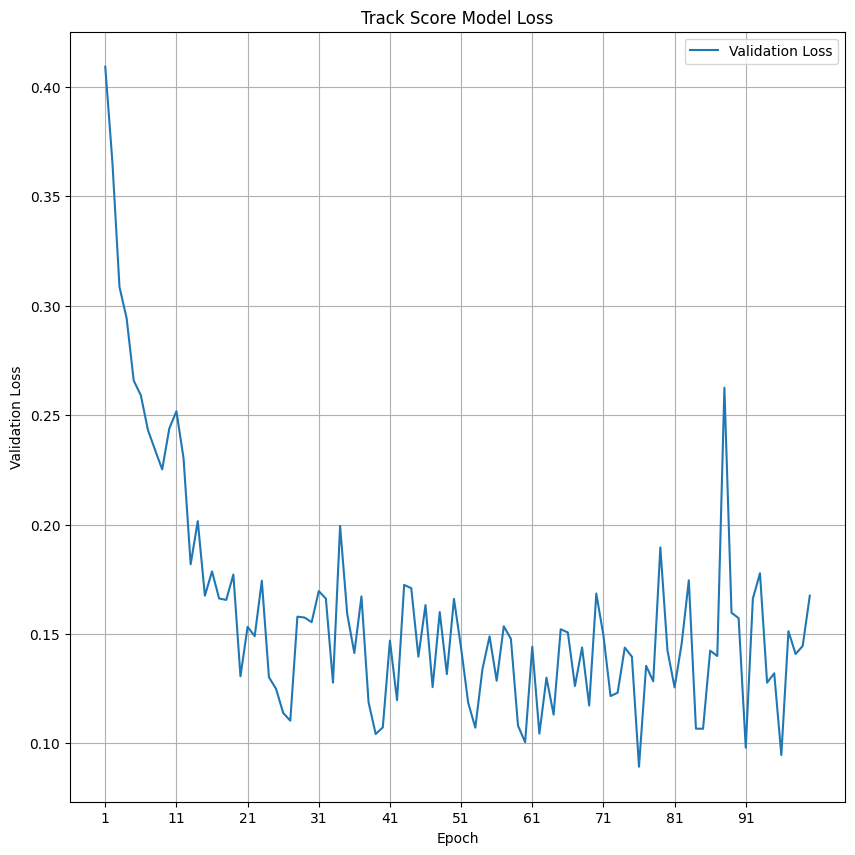

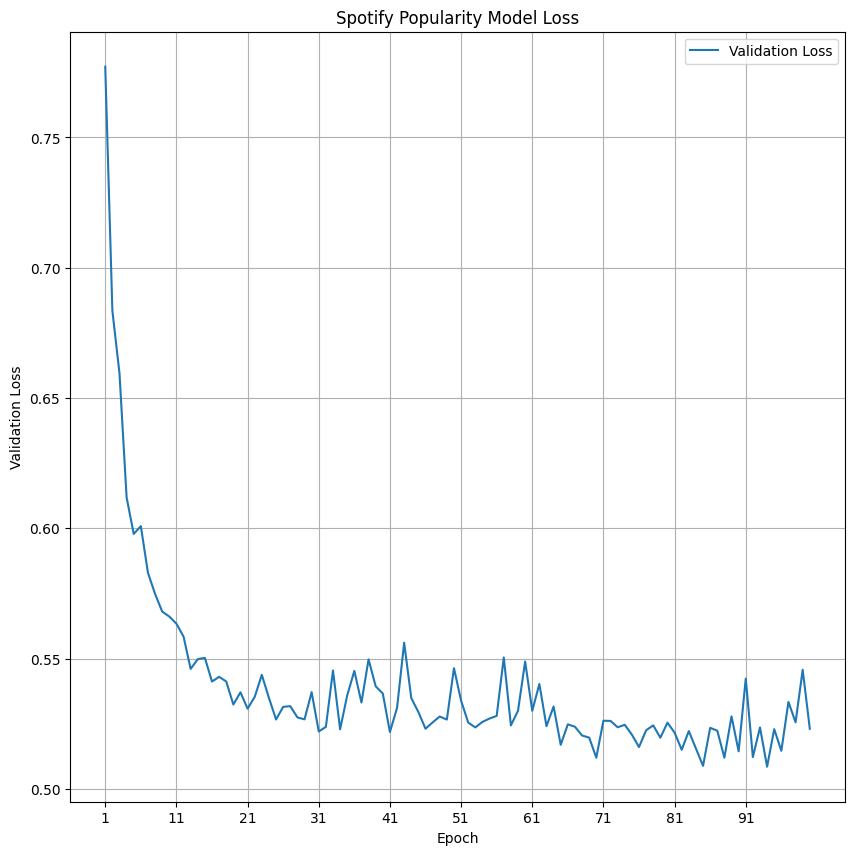

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Track Score NN MSE: 0.1420
Track Score NN R²: 0.8505
Spotify Popularity NN MSE: 0.5231
Spotify Popularity NN R²: 0.5235


In [ ]:
# ================================
# IMPORTS
# ================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ================================
# FEATURE SELECTION
# ================================
numeric_features = [
    "Spotify Streams",
    "YouTube Views",
    "TikTok Views",
    "Soundcloud Streams",
    "Pandora Streams",
    "YouTube Likes",
    "TikTok Likes",
    "Shazam Counts",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "Apple Music Playlist Count",
    "Deezer Playlist Count",
    "Deezer Playlist Reach",
    "Playlist Count",
    "Playlist Reach",
    "All Time Rank",
    "Explicit Track"
]

X = df_standardized[numeric_features]
y_track = df_standardized["Track Score"]
y_spotify = df_standardized["Spotify Popularity"]

# ================================
# REMOVE ROWS WITH MISSING TARGETS
# ================================
mask_track = ~y_track.isna()
mask_spotify = ~y_spotify.isna()

X_track = X[mask_track].copy()
y_track = y_track[mask_track].copy()

X_spotify = X[mask_spotify].copy()
y_spotify = y_spotify[mask_spotify].copy()

# ================================
# TRAIN/TEST SPLIT
# ================================
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(
    X_track, y_track, test_size=0.2, random_state=42
)
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(
    X_spotify, y_spotify, test_size=0.2, random_state=42
)

# ================================
# FILL MISSING FEATURES
# ================================
X_train_track = X_train_track.fillna(X_train_track.median())
X_test_track = X_test_track.fillna(X_train_track.median())

X_train_spotify = X_train_spotify.fillna(X_train_spotify.median())
X_test_spotify = X_test_spotify.fillna(X_train_spotify.median())

# ================================
# SCALE FEATURES
# ================================
scaler_X_track = StandardScaler()
X_train_track_scaled = scaler_X_track.fit_transform(X_train_track)
X_test_track_scaled = scaler_X_track.transform(X_test_track)

scaler_X_spotify = StandardScaler()
X_train_spotify_scaled = scaler_X_spotify.fit_transform(X_train_spotify)
X_test_spotify_scaled = scaler_X_spotify.transform(X_test_spotify)

# ================================
# SCALE TARGETS
# ================================
scaler_y_track = StandardScaler()
y_train_track_scaled = scaler_y_track.fit_transform(y_train_track.values.reshape(-1,1))
y_test_track_scaled = scaler_y_track.transform(y_test_track.values.reshape(-1,1))

scaler_y_spotify = StandardScaler()
y_train_spotify_scaled = scaler_y_spotify.fit_transform(y_train_spotify.values.reshape(-1,1))
y_test_spotify_scaled = scaler_y_spotify.transform(y_test_spotify.values.reshape(-1,1))

# ================================
# BUILD NEURAL NETWORK
# ================================
def build_regression_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Create models
nn_track = build_regression_model(X_train_track_scaled.shape[1])
nn_spotify = build_regression_model(X_train_spotify_scaled.shape[1])

# ================================
# TRAIN MODELS + SAVE HISTORY
# ================================
history_track = nn_track.fit(
    X_train_track_scaled, y_train_track_scaled,
    validation_split=0.1, epochs=100,
    batch_size=32, verbose=1
)

history_spotify = nn_spotify.fit(
    X_train_spotify_scaled, y_train_spotify_scaled,
    validation_split=0.1, epochs=100,
    batch_size=32, verbose=1
)

# ================================
# PLOT TRAINING & VALIDATION LOSS
# ================================
def plot_val_loss(history, title):
    val_loss = history.history['val_loss']
    epochs = np.arange(1, len(val_loss)+1)

    tick_positions = np.arange(0, len(epochs), 10)
    tick_labels = (tick_positions + 1).astype(int)

    plt.figure(figsize=(10,10))
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.xticks(tick_labels)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_val_loss(history_track, "Track Score Model Loss")
plot_val_loss(history_spotify, "Spotify Popularity Model Loss")

# ================================
# PREDICTIONS & METRICS
# ================================
y_pred_track_scaled = nn_track.predict(X_test_track_scaled)
y_pred_track = scaler_y_track.inverse_transform(y_pred_track_scaled)

y_pred_spotify_scaled = nn_spotify.predict(X_test_spotify_scaled)
y_pred_spotify = scaler_y_spotify.inverse_transform(y_pred_spotify_scaled)

mse_track = mean_squared_error(y_test_track, y_pred_track)
r2_track = r2_score(y_test_track, y_pred_track)
print(f"Track Score NN MSE: {mse_track:.4f}")
print(f"Track Score NN R²: {r2_track:.4f}")

mse_spotify = mean_squared_error(y_test_spotify, y_pred_spotify)
r2_spotify = r2_score(y_test_spotify, y_pred_spotify)
print(f"Spotify Popularity NN MSE: {mse_spotify:.4f}")
print(f"Spotify Popularity NN R²: {r2_spotify:.4f}")

In [15]:
print(df_standardized.columns.tolist())

['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'Explicit Track', 'Artist Genres', 'Streams', 'Views', 'Likes', 'Playlist Count', 'Playlist Reach']
